In [1]:
%pylab inline

In [6]:
import sys
sys.path.append('/Users/mirkodandrea/development/Propagator2/pyPropagator/')

In [7]:
import numpy as np
from numpy import pi, exp, tanh, sign
from numpy.random import rand
from propagator.propagator import w_h_effect

FileNotFoundError: [Errno 2] No such file or directory: 'time_table.txt'

In [ ]:
neighbours = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

dist = np.array([[1.414, 1, 1.414], [1, 0, 1], [1.414, 1,1.414]])
angle = np.array([[3*pi/4, pi/2, pi/4], [pi, np.nan, 0], [5*pi/4, 3*pi/2, 7*pi/4]])
# [latifoglie cespugli aree_nude erba conifere coltivi faggete]
v0 = [30, 15, 60, 10, 20, 10, 40]

table_veg = np.loadtxt('tabVeg.txt')

Contributo del vento
------------------

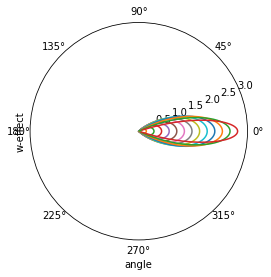

In [13]:
b = np.arange(-pi, pi, 0.01)
wspeeds = np.arange(0, 70, 5)
for wspeed in wspeeds:
    ws = wspeed
    w = 3*(wspeed * exp(-(b**2) / (1 + (-0.5 * (ws / 50)**2))) - (ws / 2)) / 35
    ax = plt.subplot(111, projection='polar')
    ax.plot(b, w)    
    

plt.xlabel('angle')
plt.ylabel('w-effect')
plt.grid()

Contributo della quota
---------

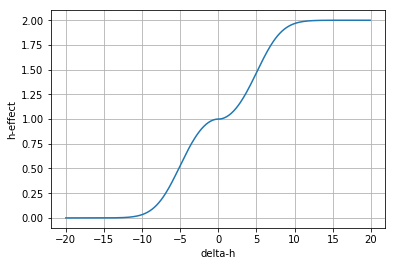

In [17]:
dh = np.arange(-20,20,0.1)
h = (1 + tanh((dh / 7)**2. * sign(dh)))
plt.plot(dh, h)
plt.grid()
plt.xlabel('delta-h')
plt.ylabel('h-effect')

composizione vettoriale dei contributi
----------------------

In [23]:
W_SPEED = np.arange(0, 70, 0.1)
DH = np.arange(-20, 20, 0.1)

W_EFFECT = 2*(W_SPEED - (W_SPEED / 2)) / 35
H_EFFECT = np.tanh((DH / 7)**2. * sign(DH))

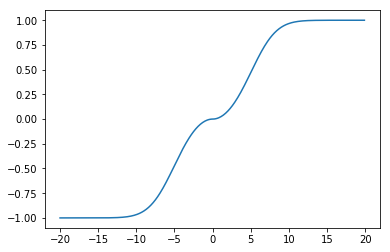

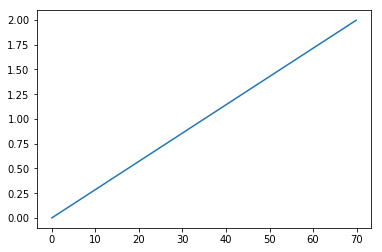

In [28]:
plot(DH, H_EFFECT)
figure()
plot(W_SPEED, W_EFFECT)

In [43]:
def normalize(angle):
    return (angle + pi) % (2*pi) - pi

def w_h_contrib(angle_to, w_dir, w_speed, dh):
    '''
    w_effect_module = 1.5*(w_speed - (w_speed / 2)) / 35
    w_effect = w_effect_module * np.array([np.cos(w_dir), np.sin(w_dir)])
    w_effect_on_direction = np.dot(w_effect, direction_to)
    '''
    angle_b = w_dir-angle_to
    w_effect_on_direction = 3*(w_speed * exp(-(angle_b**2) / (1 + (-0.5 * (w_speed / 50)**2))) - (w_speed / 2)) / 35


    h_effect = 3*tanh((dh / 7)**2. * sign(dh))

    w_h = h_effect + w_effect_on_direction
    w_h_norm = (1/(1-w_h)) if w_h<0 else (w_h+1)
    #print(w_effect_module, h_effect, w_h, w_h_norm)
    return w_h_norm

In [46]:
ANGLE_TO = np.linspace(-np.pi, np.pi, 100)
DIR_TO = np.array([np.cos(ANGLE_TO), np.sin(ANGLE_TO)]).T

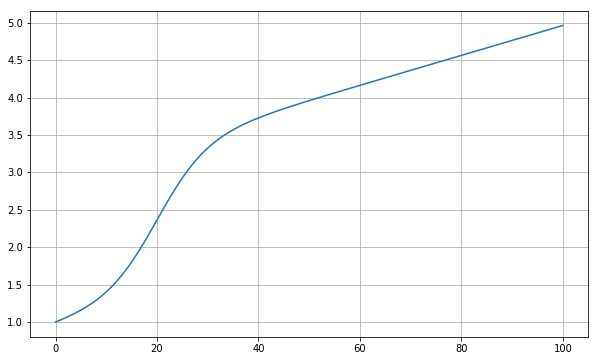

In [58]:
W_SPEED = np.linspace(0, 100, 100, endpoint=True)

D1 = 0.5
D2 = 2
D3 = 10
D4 = 2
D5 = 50
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))
WS = A + (D1 * (D2 * np.tanh((W_SPEED / D3) - D4))) + (W_SPEED / D5)

figure()
grid()

plot(W_SPEED, WS)

Populating the interactive namespace from numpy and matplotlib


/Users/mirkodandrea/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


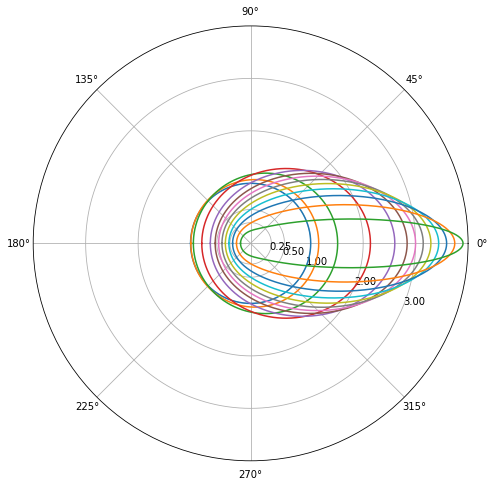

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
D1 = 0.5
D2 = 2
D3 = 10
D4 = 2
D5 = 50
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))
W_SPEED = np.linspace(0, 100, 100, endpoint=True)
W_DIR = np.linspace(-np.pi, np.pi, 1000, endpoint=True)
q = W_DIR

for s in W_SPEED[0::8]:
    we = (A + (D1 * (D2 * np.tanh((s / D3) - D4))) + (s / D5))
    a = (we-1)/4
    
    r = (a + 1)*(1 - a**2)/(1 - a * np.cos(q+2*np.pi))

    ax = plt.subplot(111, projection='polar')
    ax.plot(q, r)
    ax.set_rmax(4)

ax.set_rticks([0.25, 0.5, 1, 2, 3])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

In [3]:
    w_effect_module = (A + (D1 * (D2 * np.tanh((w_speed / D3) - D4))) + (w_speed / D5))
    a = (w_effect_module - 1) / 4
    w_effect_on_direction = (a + 1) * (1 - a ** 2) / (1 - a * np.cos(normalize(w_dir - angle_to)))
    h_effect = 1.5 * tanh((dh / 7) ** 2. * sign(dh))

    w_h = h_effect + w_effect_on_direction


NameError: name 'w_speed' is not defined

Populating the interactive namespace from numpy and matplotlib


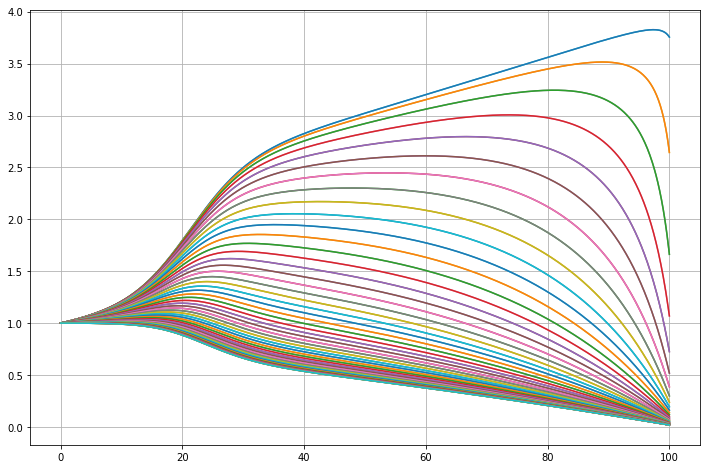

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
D1 = 0.5
D2 = 2
D3 = 10
D4 = 2
D5 = 50
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))
W_SPEED = np.linspace(0, 100, 1000, endpoint=True)
W_DIR = np.linspace(-np.pi, np.pi, 100, endpoint=True)
#W_DIR = np.linspace(-np.pi/5, np.pi/5, 10, endpoint=True)
q = W_DIR


for q in W_DIR:
    vv = []
    
    for s in W_SPEED:
        we = (A + (D1 * (D2 * np.tanh((s / D3) - D4))) + (s / D5))
        we = np.clip(we, 0, 5)
        a = (we-1)/4       
        r = (a + 1)*(1 - a**2)/(1 - a * np.cos(q))
        vv.append(r)
        
    str(q/np.pi*180)
    plot(W_SPEED, vv)
grid()

Populating the interactive namespace from numpy and matplotlib


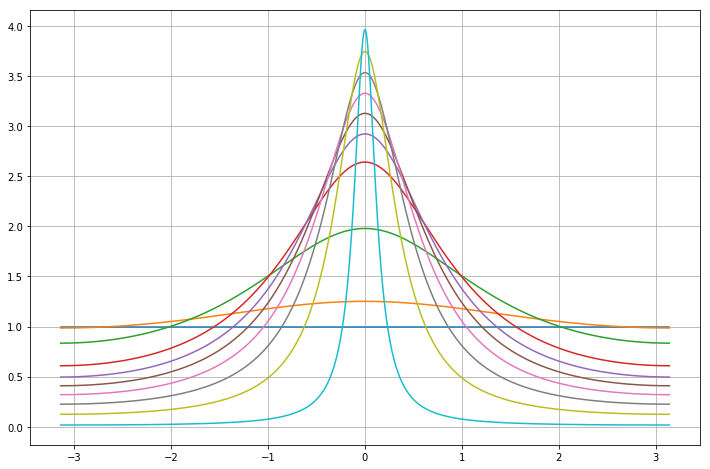

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
D1 = 0.5
D2 = 2
D3 = 10
D4 = 2
D5 = 50
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))
W_SPEED = np.linspace(0, 100, 10, endpoint=True)
W_DIR = np.linspace(-np.pi, np.pi, 1000, endpoint=True)
#W_DIR = np.linspace(-np.pi/5, np.pi/5, 10, endpoint=True)
q = W_DIR


    
for s in W_SPEED:
    vv = []
    for q in W_DIR:
    

        we = (A + (D1 * (D2 * np.tanh((s / D3) - D4))) + (s / D5))
        we = np.clip(we, 0, 5)
        a = (we-1)/4       
        r = (a + 1)*(1 - a**2)/(1 - a * np.cos(q))
        vv.append(r)
        
    str(q/np.pi*180)
    plot(W_DIR, vv)
grid()

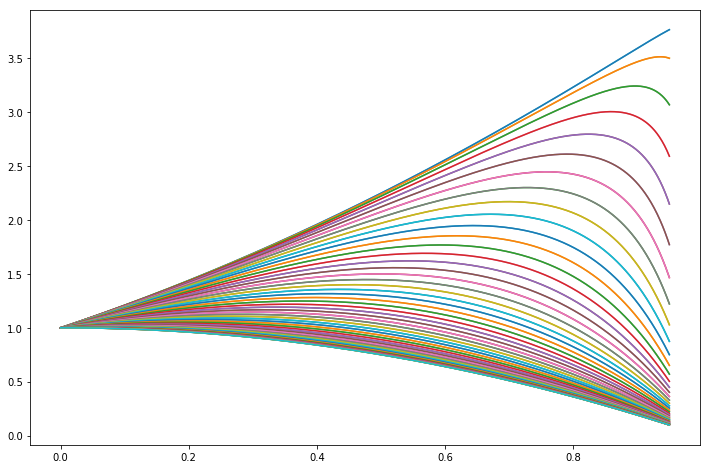

In [59]:
a = np.linspace(0, 0.95, 1000, endpoint=True)
for q in W_DIR:
    r = (a + 1)*(1 - a**2)/(1 - 1*a * np.cos(q))

    plot(a, r)

In [11]:
import numpy as np

D1 = 0.5
D2 = 2
D3 = 10
D4 = 2
D5 = 50
A = 1 - ((D1 * (D2 * np.tanh((0 / D3) - D4))) + (0 / D5))

def normalize(angle_to_norm):
    return (angle_to_norm + pi) % (2 * pi) - pi


def w_h_effect(angle_to, w_speed, w_dir, dh):
    w_effect_module = (A + (D1 * (D2 * np.tanh((w_speed / D3) - D4))) + (w_speed / D5))
    a = (w_effect_module - 1) / 4
    w_effect_on_direction = (a + 1) * (1 - a ** 2) / (1 - a * np.cos(normalize(w_dir - angle_to)))
    h_effect = 1.5 * tanh((dh / 7) ** 2. * sign(dh))
    w_h = h_effect + w_effect_on_direction
    return w_h


neighbours = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
dist = np.array([[1.414, 1, 1.414], [1, 0, 1], [1.414, 1,1.414]])
angle = np.array([[3*pi/4, pi/2, pi/4], [pi, np.nan, 0], [5*pi/4, 3*pi/2, 7*pi/4]])

w_h_arr = []
for w_speed in np.linspace(0, 100, 100, endpoint=True):
        w_h = w_h_effect(0.0, w_speed, 0.0, 0.0)
        w_h_arr.append(w_h)

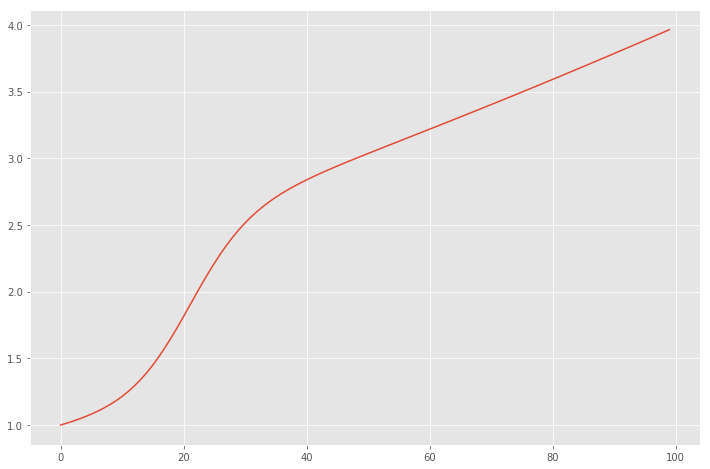

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot(w_h_arr)